<a href="https://colab.research.google.com/github/the-decode/Pattern-Recognition/blob/main/RFC_Active_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Initialisation

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
try:
    df = raw.copy()
    print(df.info())
    
except NameError:
    raw = pd.read_pickle("/content/drive/MyDrive/colab_raw/LSWMD.pkl")
    df = raw.copy()
    df.info

In [ ]:
df.head()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,[[Training]],[[none]]
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,[[Training]],[[none]]
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,[[Training]],[[none]]
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,[[Training]],[[none]]
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,[[Training]],[[none]]


In [ ]:
df.sample(5)

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
781278,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1414.0,lot46317,6.0,[],[]
791806,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1,...",562.0,lot46743,24.0,[[Test]],[[none]]
223474,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1507.0,lot14070,13.0,[],[]
325350,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",4799.0,lot19664,11.0,[],[]
786651,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,...",952.0,lot46534,12.0,[[Test]],[[none]]


For the classfication of the waferMap, in the provided dataset only waferMap and trainTestLabel and failureType are required and hance we are dropping all the remaining columns

In [ ]:
df = df.drop(['waferIndex', 'dieSize', 'lotName'], axis = 1)

In [ ]:
df.sample(5)

,waferMap,trianTestLabel,failureType
34538,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",[],[]
782116,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",[[Test]],[[none]]
221701,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",[],[]
120439,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,...",[],[]
29958,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,...",[],[]


For the ease of computations, we are renaming the Failure Types an the Faulty Labels in the dataset

In [ ]:
df['failureNum']=df.failureType
df['trainTestNum']=df.trianTestLabel

mapping_type={
              'Center':0,
              'Donut':1,
              'Edge-Loc':2,
              'Edge-Ring':3,
              'Loc':4,
              'Random':5,
              'Scratch':6,
              'Near-full':7,
              'none':8
            }

mapping_traintest={
                   'Training':0,
                   'Test':1
                }

df=df.replace({'failureNum':mapping_type, 'trainTestNum':mapping_traintest})

/usr/local/lib/python3.7/dist-packages/pandas/core/array_algos/replace.py:84: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  op = lambda x: operator.eq(x, b)


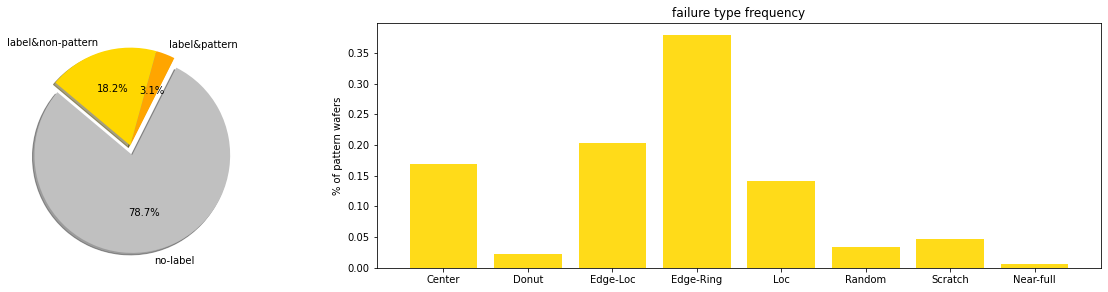

In [ ]:
df_withlabel = df[(df['failureNum']>=0) & (df['failureNum']<=8)]
df_withlabel =df_withlabel.reset_index()
df_withpattern = df[(df['failureNum']>=0) & (df['failureNum']<=7)].reset_index()
df_nonpattern = df[(df['failureNum']==8)].reset_index()

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import gridspec
fig = plt.figure(figsize=(20, 4.5)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 2.5]) 
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

no_wafers=[811457-df_withlabel.shape[0], df_withpattern.shape[0], df_nonpattern.shape[0]]

colors = ['silver', 'orange', 'gold']
explode = (0.1, 0, 0)  # explode 1st slice
labels = ['no-label','label&pattern','label&non-pattern']
ax1.pie(no_wafers, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

uni_pattern=np.unique(df_withpattern.failureNum, return_counts=True)
labels2 = ['','Center','Donut','Edge-Loc','Edge-Ring','Loc','Random','Scratch','Near-full']
ax2.bar(uni_pattern[0],uni_pattern[1]/df_withpattern.shape[0], color='gold', align='center', alpha=0.9)
ax2.set_title("failure type frequency")
ax2.set_ylabel("% of pattern wafers")
ax2.set_xticklabels(labels2)

plt.show()

172,950 wafers have labels while 78.7% wafers with no label based on failureType variable filtering.

These are the first 100 Samples of the WaferMaps


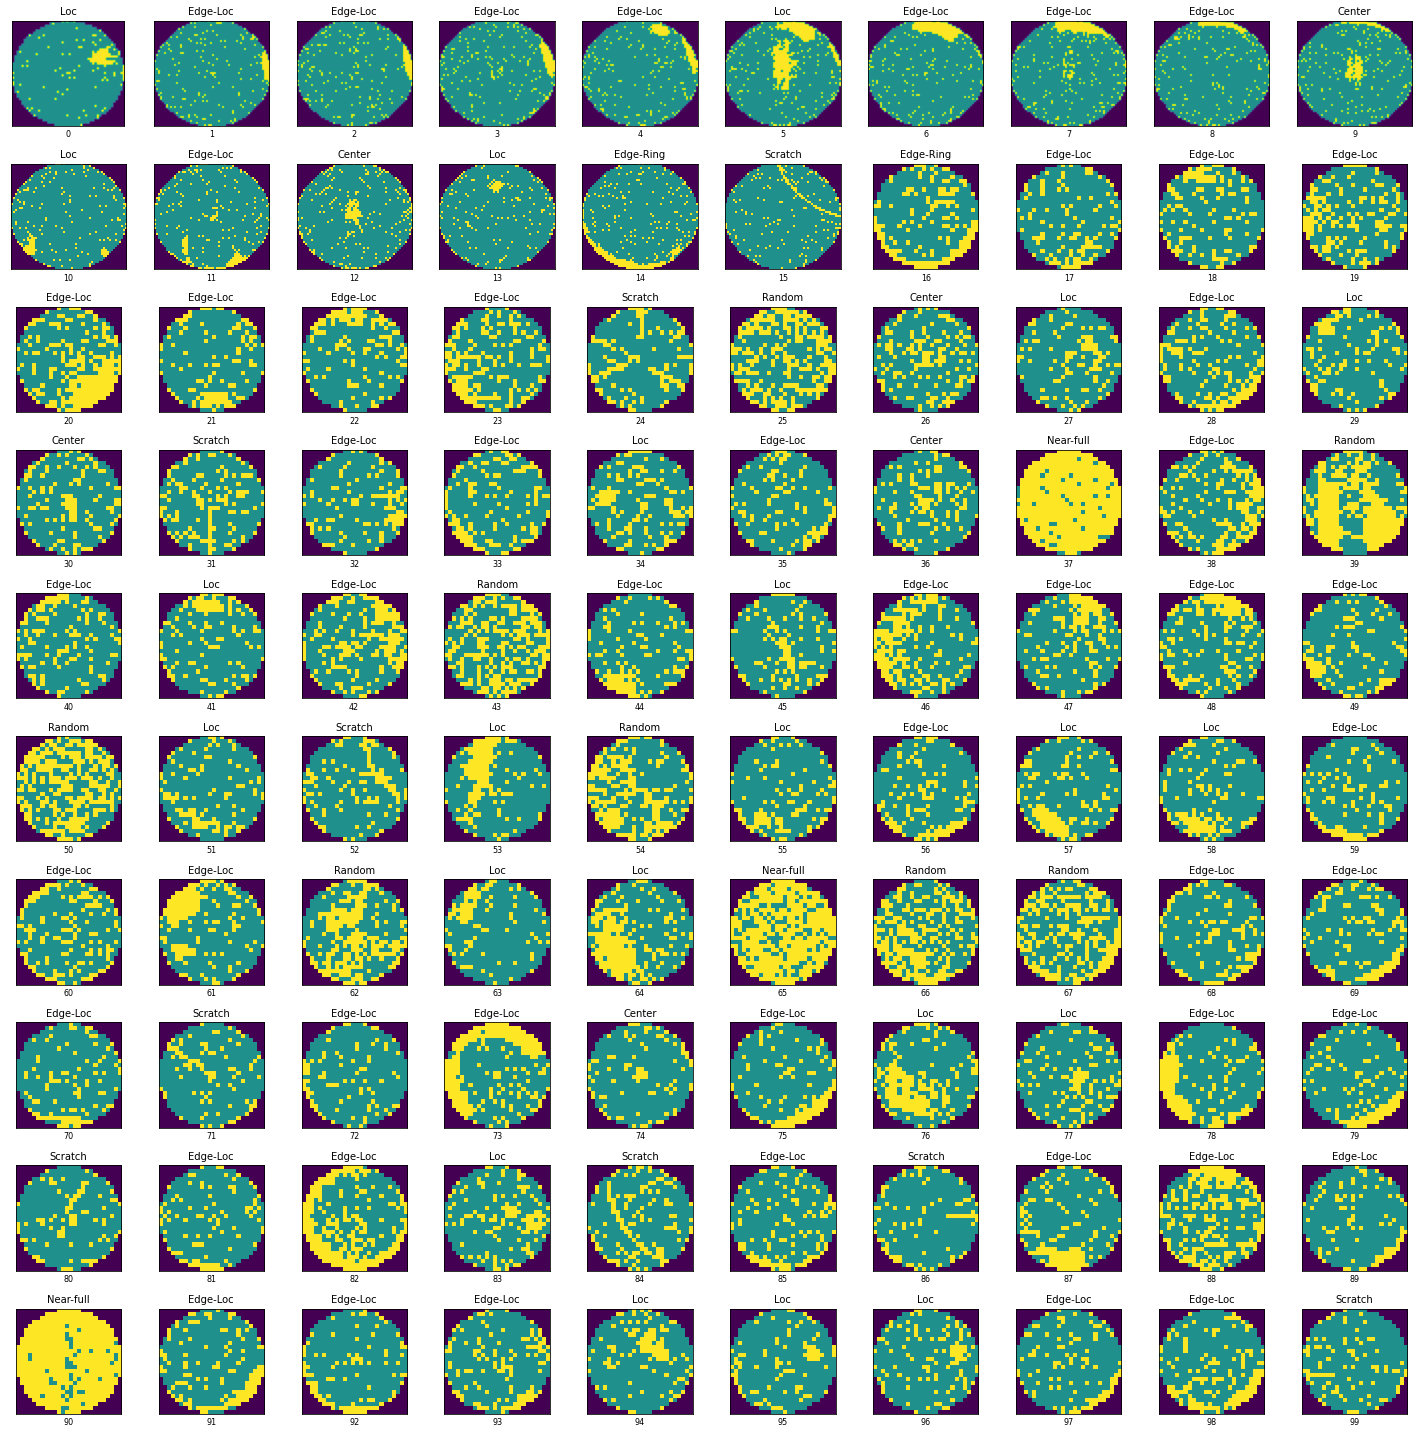

In [ ]:
fig, ax = plt.subplots(nrows = 10, ncols = 10, figsize=(20, 20))
ax = ax.ravel(order='C')
for i in range(100):
    img = df_withpattern.waferMap[i]
    ax[i].imshow(img)
    ax[i].set_title(df_withpattern.failureType[i][0][0], fontsize=10)
    ax[i].set_xlabel(df_withpattern.index[i], fontsize=8)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.tight_layout()
plt.show() 

These are the set of Error Types

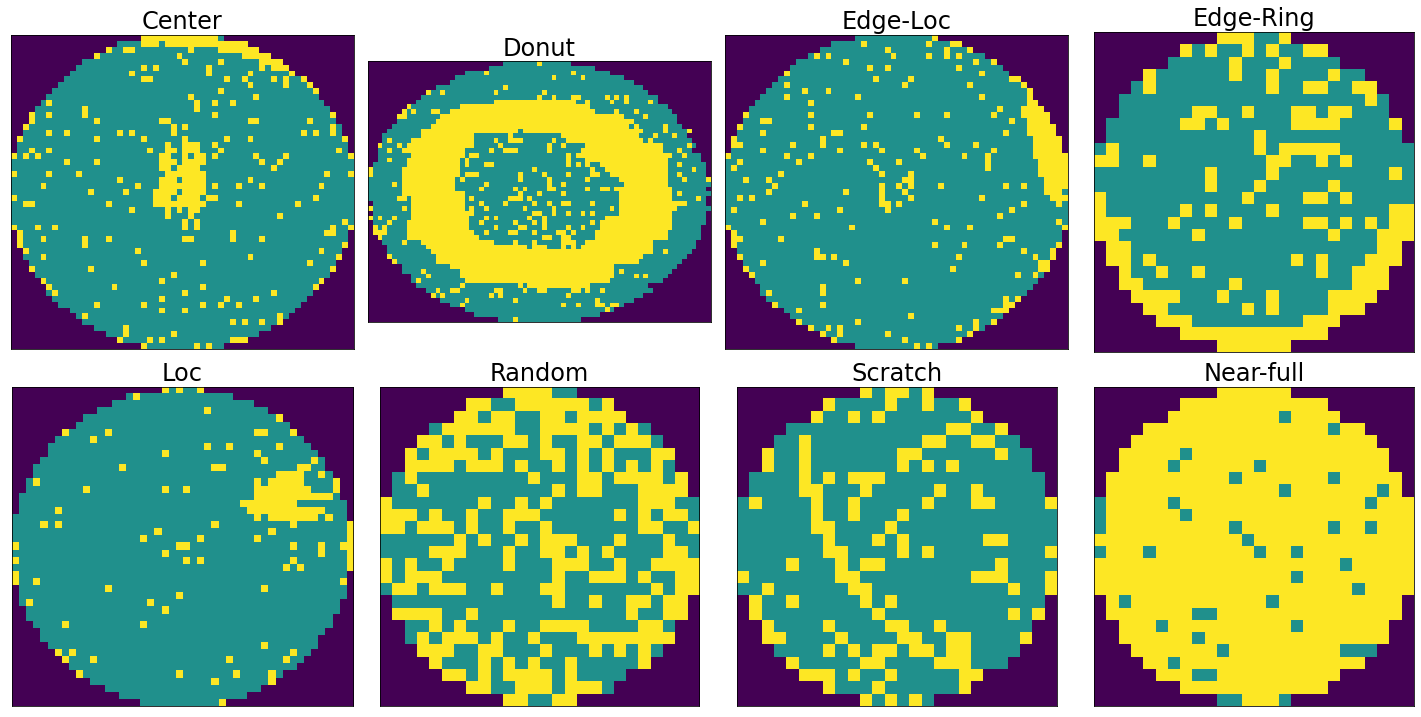

In [ ]:
x = [9,340, 3, 16, 0, 25, 84, 37]
labels2 = ['Center','Donut','Edge-Loc','Edge-Ring','Loc','Random','Scratch','Near-full']

#ind_def = {'Center': 9, 'Donut': 340, 'Edge-Loc': 3, 'Edge-Ring': 16, 'Loc': 0, 'Random': 25,  'Scratch': 84, 'Near-full': 37}
fig, ax = plt.subplots(nrows = 2, ncols = 4, figsize=(20, 10))
ax = ax.ravel(order='C')
for i in range(8):
    img = df_withpattern.waferMap[x[i]]
    ax[i].imshow(img)
    ax[i].set_title(df_withpattern.failureType[x[i]][0][0],fontsize=24)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.tight_layout()
plt.show() 

# Region based Pre Processing

The following classification is referred from
https://www.kaggle.com/ashishpatel26/wm-811k-wafermap

We shall condsider the waferMap into 13 regions and will calculate the density of each region making them as the independent variables for the classification

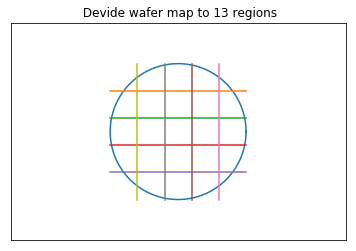

In [ ]:
def cal_den(x):
    return 100*(np.sum(x==2)/np.size(x))  

def find_regions(x):
    try:
        rows=np.size(x,axis=0)
        cols=np.size(x,axis=1)
        ind1=np.arange(0,rows,rows//5)
        ind2=np.arange(0,cols,cols//5)
        
        reg1=x[ind1[0]:ind1[1],:]
        reg3=x[ind1[4]:,:]
        reg4=x[:,ind2[0]:ind2[1]]
        reg2=x[:,ind2[4]:]

        reg5=x[ind1[1]:ind1[2],ind2[1]:ind2[2]]
        reg6=x[ind1[1]:ind1[2],ind2[2]:ind2[3]]
        reg7=x[ind1[1]:ind1[2],ind2[3]:ind2[4]]
        reg8=x[ind1[2]:ind1[3],ind2[1]:ind2[2]]
        reg9=x[ind1[2]:ind1[3],ind2[2]:ind2[3]]
        reg10=x[ind1[2]:ind1[3],ind2[3]:ind2[4]]
        reg11=x[ind1[3]:ind1[4],ind2[1]:ind2[2]]
        reg12=x[ind1[3]:ind1[4],ind2[2]:ind2[3]]
        reg13=x[ind1[3]:ind1[4],ind2[3]:ind2[4]]
        
        fea_reg_den = []
        fea_reg_den = [cal_den(reg1),cal_den(reg2),cal_den(reg3),cal_den(reg4),cal_den(reg5),cal_den(reg6),cal_den(reg7),cal_den(reg8),cal_den(reg9),cal_den(reg10),cal_den(reg11),cal_den(reg12),cal_den(reg13)]
        return fea_reg_den
    
    except ZeroDivisionError:
        return [0 for _ in range(13)]

In [ ]:
def calc_dim(img): return (np.size(img,axis=0), np.size(img,axis=1))

In [ ]:
global data, ratio
data = 2000
ratio = 200


In [ ]:
divide = dict(zip(range(9), [[], [], [], [], [], [], [], [], []]))
df_withlabel['dim'] = df_withlabel.waferMap.apply(calc_dim)
for i in range(9):
    divide[i] = df_withlabel.loc[df_withlabel['failureNum'] == i][:data+ratio]

print(*[len(divide[i]) for i in range(9)])

2200 555 2200 2200 2200 866 1193 149 2200


In [ ]:
def augment(n_arr, index = None):
    # print("In the augment", index)
    n_len = len(n_arr)
    yeet, ind = [], 0
    for img in n_arr:
        yeet.append(img)
        yeet.append(np.fliplr(img))
        yeet.append(np.flipud(yeet[-1]))
        yeet.append(np.flipud(img))
        yeet.append(np.fliplr(yeet[-1]))
        if n_len + len(yeet) > data+ratio: return yeet
    return yeet

# run()

In [ ]:
print(*[len(divide[i]) for i in range(9)])

region = dict(zip(range(9), [divide for _ in range(9)]))
test = []

for i in range(9):
    last = list(divide[i]['waferMap'])
    while len(last) < data+ratio:
        e = augment(last, i)
        if e: last.extend(e)
    last = last[:2500]
    region[i] =  [find_regions(e) for e in last][:data]
    test.append([find_regions(e) for e in last[data:data+ratio]])

print(*[len(region[i]) for i in range(9)])
print(*[len(test[i]) for i in range(9)])

2200 555 2200 2200 2200 866 1193 149 2200
2000 2000 2000 2000 2000 2000 2000 2000 2000
200 200 200 200 200 200 200 200 200


# Random Forest Ensembler

In [ ]:
global requirement
requirement = 90


def multi_accuracy(model, test):
    needed = []
    accuracy = []
    for i in range(9):
        pred = model.predict(list(test[i]))
        score = accuracy_score(pred, [i for _ in range(ratio)])
        accuracy.append(score)
        if score < requirement/100: needed.append(i)
    # print(*accuracy)
    return needed

In [ ]:
def shuffler(a, b):
    zipper = list(zip(a, b))
    shuffle(zipper)
    return zip(*zipper)

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import accuracy_score

def run():
    increment = 1
    limit = [increment for _ in range(9)]
    iterations = 1
    while True:
        if iterations == (data/increment):
            print("The data has been exhausted")
            return model
        model = RFC(max_depth=24, random_state=2022)
        x, y = [], []
        for i in range(9):
            try:
                if region[i][limit[i]]: pass
            except:
                region[i].extend(augment(list(region[i][:ratio])))
            x.extend(region[i][:limit[i]])
            y.extend([i for _ in range(limit[i])])
        x, y = shuffler(x, y)
        model.fit(x, y)
        need = multi_accuracy(model, test)
        if need:
            for e in need: limit[e] += increment
            print(f"Iteration {iterations} - {need} Overall Prediction = {(accuracy_score(model.predict(final_x), final_y))*100}")
            iterations += 1
        else: break
    return model

model = run()

In [ ]:
from random import shuffle

final_x = []
final_y = []
for i, e in enumerate(test):
    final_x.extend(e)
    final_y.extend([i for _ in range(ratio)])



print(len(final_x), len(final_y))

predictions = model.predict(final_x)
accuracy_score(predictions, final_y)

1800 1800


0.8338888888888889

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else: print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')    

Confusion matrix, without normalization
Normalized confusion matrix


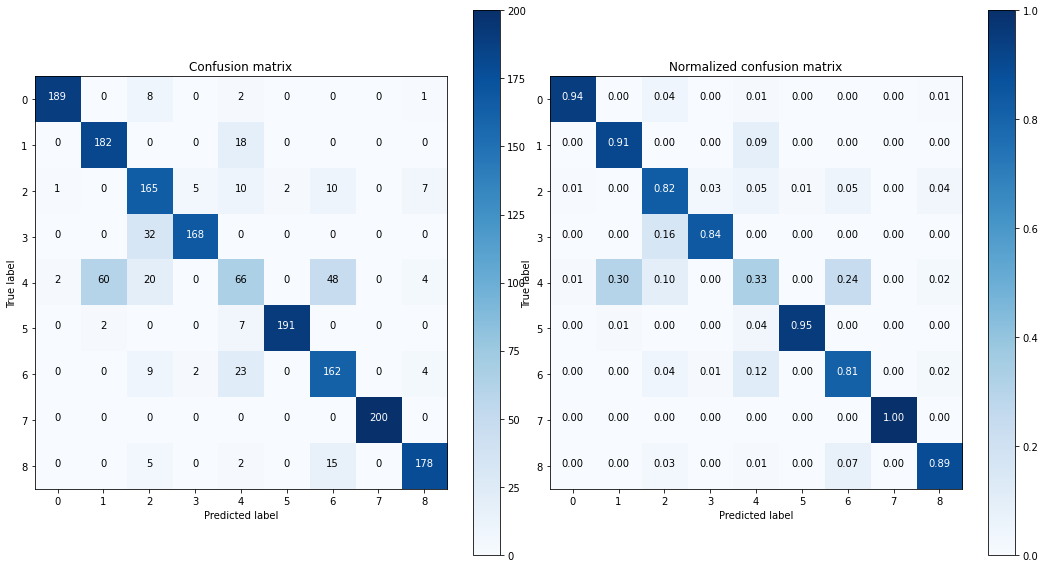

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(final_y, predictions)
np.set_printoptions(precision=2)

from matplotlib import gridspec
fig = plt.figure(figsize=(15, 8)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1]) 

## Plot non-normalized confusion matrix
plt.subplot(gs[0])
plot_confusion_matrix(cnf_matrix, title='Confusion matrix')

# Plot normalized confusion matrix
plt.subplot(gs[1])
plot_confusion_matrix(cnf_matrix, normalize=True, title='Normalized confusion matrix')

plt.show()